<a href="https://colab.research.google.com/github/Bloodflake/sign_language_mnsit/blob/master/sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import pandas as pd


In [6]:
def get_data(filename):
    images = np.empty(1)
    labels = np.empty(1)
    with open(filename) as training_file:
      data = np.loadtxt(training_file,delimiter=',',skiprows=1)
      for row in data:
        images.append(row[1:])
        labels.append(row[0])
      images = np.reshape(images,(images.shape[0],28,28))
      labels = np.array(label).astype('float')
    return images, labels

In [7]:
data_test = pd.read_csv("/content/drive/My Drive/sign_mnist_test.csv",skiprows=0)
data_train = pd.read_csv("/content/drive/My Drive/sign_mnist_train.csv",skiprows=0)

In [8]:
data_train.shape

(27455, 785)

In [9]:
data_test.shape

(7172, 785)

In [10]:
testing_images, testing_labels = np.array(data_test.iloc[:,1:]), np.array(data_test.iloc[:,0])
training_images, training_labels = np.array(data_train.iloc[:,1:]), np.array(data_train.iloc[:,0])

In [11]:
testing_images = np.reshape(testing_images,(testing_images.shape[0],28,28))
training_images = np.reshape(training_images,(training_images.shape[0],28,28))

In [12]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [13]:
training_images = np.expand_dims(training_images,3)
testing_images = np.expand_dims(testing_images,3)

In [14]:
train_datagen = ImageDataGenerator(rescale=1/255,width_shift_range=0.2,height_shift_range=0.2, #Data augmentaion
                                   rotation_range = 40,zoom_range = 0.2)

validation_datagen = ImageDataGenerator(rescale=1/255,zoom_range = 0.2)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)]
    )


In [16]:
model.compile(loss = tf.losses.sparse_categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3

In [17]:
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32,),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
858/857 [==============================] - 10s 12ms/step - loss: 2.6691 - accuracy: 0.1959 - val_loss: 1.5656 - val_accuracy: 0.4951
Epoch 2/10
858/857 [==============================] - 10s 12ms/step - loss: 1.8145 - accuracy: 0.4328 - val_loss: 0.9968 - val_accuracy: 0.6649
Epoch 3/10
858/857 [==============================] - 10s 12ms/step - loss: 1.3285 - accuracy: 0.5699 - val_loss: 0.7390 - val_accuracy: 0.7440
Epoch 4/10
858/857 [==============================] - 10s 12ms/step - loss: 1.0317 - accuracy: 0.6633 - val_loss: 0.5667 - val_accuracy: 0.7934
Epoch 5/10
858/857 [==============================] - 10s 12ms/step - loss: 0.8534 - accuracy: 0.7177 - val_loss: 0.5149 - val_accuracy: 0.8019
Epoch 6/10
858/857 [==============================] - 10s 12ms/step - loss: 0.7223 - accuracy: 0.7600 - val_loss: 0.3660 - val_accuracy: 0.8710
Epoch 7/10
858/857 [==============================] - 10s 12

In [18]:
model.evaluate(testing_images, testing_labels)

225/225 [==============================] - 1s 2ms/step - loss: 168.3651 - accuracy: 0.6962


[168.3650665283203, 0.6961795687675476]

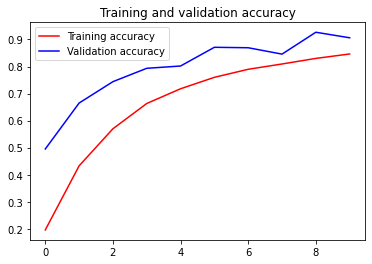

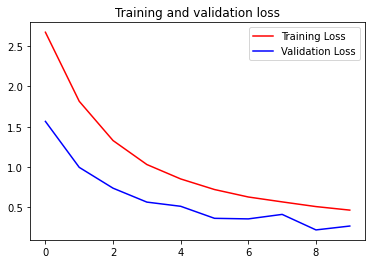

In [20]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()